# Introduction

**Chronic kidney disease (CKD) means your kidneys are damaged and can’t filter blood the way they should. The disease is called “chronic” because the damage to your kidneys happens slowly over a long period of time. This damage can cause wastes to build up in your body. CKD can also cause other health problems.**

**The goal of this kernel is to process the data well in preparation for applying machine learning algorithms to it, and it is okay to apply simple neural networks to it if necessary.**

**Let's move forward and get to work...**

Data Description:
You can see the description [here](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

* age - age
* bp - blood pressure
* sg - specific gravity
* al - albumin
* su - sugar
* rbc - red blood cells
* pc - pus cell
* pcc - pus cell clumps
* ba - bacteria
* bgr - blood glucose random
* bu - blood urea
* sc - serum creatinine
* sod - sodium
* pot - potassium
* hemo - hemoglobin
* pcv - packed cell volume
* wc - white blood cell count
* rc - red blood cell count
* htn - hypertension
* dm - diabetes mellitus
* cad - coronary artery disease
* appet - appetite
* pe - pedal edema
* ane - anemia
* class - class

**Our map will be as follows.**

**Glossary:**

```
1. EDA and Preprocessing  
    1.1. Load Data
    1.2. Format Feature Names
    1.3. Dealing with missing data
    1.4. Encoding Categorical Variables
    1.5. Feature Correlation
    1.6. Decision Tree as EDA
    1.7.Complete the data split

2. Machine Learning Algorithms
    2.1. Support Vector classifier
    2.2. Make sure the results are accurate
    2.3. ExtraTreesClassifier Algorithm
    2.4. Make sure the results are accurate

3. Deep Learning Model
    3.1. Keras Functional API Model
    3.2. Saving the weights of the network
    3.3. Sequential Model
    3.4. Saving the weights of Sequential Model

4. End

```

# Applying Deep Learning model to classify Chronic Kidney Disease

![Chronic kidney disease (CKD)](https://qph.fs.quoracdn.net/main-qimg-c9a8629b3ab5cd8befbbd11d303de72b)

## Calling the necessary libraries

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')

## Part 1: EDA and Preprocessing

## 1.1. Load Data

In [3]:
data=pd.read_csv('../input/ckdisease/kidney_disease.csv')

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
data.shape

(400, 26)

## 1.2: Format Feature Names

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**There is a loss of values in all three data types, so isolating each of the types and manipulating them on their own might be a good option, but let's go ahead and see what we do next.**

In [8]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

**Let's separate the data types so that we can dive into more explorations.**

In [9]:
# Let's see the unique values of some columns
print(data['dm'].value_counts())
print('-'*50)
print(data['cad'].value_counts())
print('-'*50)
print(data['classification'].value_counts())

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
--------------------------------------------------
no      362
yes      34
\tno      2
Name: cad, dtype: int64
--------------------------------------------------
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64


**From the results I got above, I must correct the results.**

In [10]:
# make a replace for incorect value 

data['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['cad'] = data['cad'].replace(to_replace = '\tno', value='no')

data['classification'] = data['classification'].replace(to_replace = {'ckd\t': 'ckd'})

In [11]:
# Before we separate, we first have to convert some columns to numeric. 
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

In [12]:
data['classification'] = data['classification'].map({'ckd': 0, 'notckd': 1})
data['classification'] = pd.to_numeric(data['classification'], errors='coerce')

In [13]:
# Extracting categorical and numerical columns

# select categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
print('categorical_cols are : \n\n',categorical_cols , '\n')
print('-.'*40 , '\n')

# select numeric columns
df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('numeric_cols  are  : \n\n' , numeric_cols)

categorical_cols are : 

 ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] 

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. 

numeric_cols  are  : 

 ['age' 'bp' 'sg' 'al' 'su' 'bgr' 'bu' 'sc' 'sod' 'pot' 'hemo' 'pcv' 'wc'
 'rc' 'classification']


In [14]:
# looking at unique values in categorical columns

for col in categorical_cols:
    print(f"{col} has : {data[col].unique()} unique values\n")

rbc has : [nan 'normal' 'abnormal'] unique values

pc has : ['normal' 'abnormal' nan] unique values

pcc has : ['notpresent' 'present' nan] unique values

ba has : ['notpresent' 'present' nan] unique values

htn has : ['yes' 'no' nan] unique values

dm has : ['yes' 'no' nan] unique values

cad has : ['no' 'yes' nan] unique values

appet has : ['good' 'poor' nan] unique values

pe has : ['no' 'yes' nan] unique values

ane has : ['no' 'yes' nan] unique values



# 1.3. Dealing with missing data

In [15]:
# miidding values
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [16]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 25 columns.
There are 24 columns that have missing values.


,Missing Values,% of Total Values
rbc,152,38.0
rc,131,32.8
wc,106,26.5
pot,88,22.0
sod,87,21.8
pcv,71,17.8
pc,65,16.2
hemo,52,13.0
su,49,12.2
sg,47,11.8


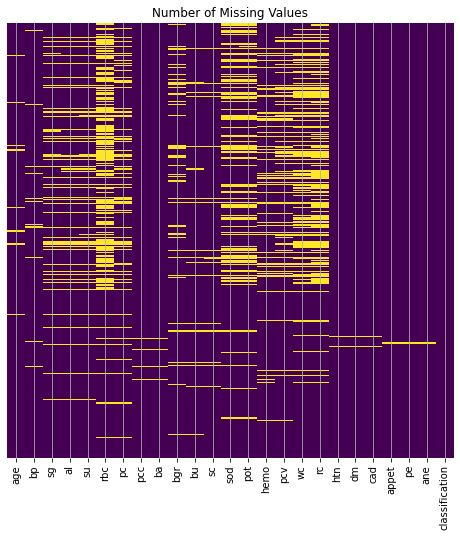

In [18]:
# Let's draw a map of the missing values
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')

**Deciding how to deal with missing values is a very difficult decision, especially because I am dealing with medical data and want to build a strong enough model to get real results.**

**So I replaced the missing values with a question mark "?" .
Thus, if the patient did not measure and insert a column of columns, he will fill in the question mark symbol, and therefore this is the best solution in that part.**

In [19]:
df=data.replace(np.nan,'?')

In [20]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [21]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,?,normal,notpresent,notpresent,?,...,38.0,6000.0,?,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,?,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             400 non-null    object
 1   bp              400 non-null    object
 2   sg              400 non-null    object
 3   al              400 non-null    object
 4   su              400 non-null    object
 5   rbc             400 non-null    object
 6   pc              400 non-null    object
 7   pcc             400 non-null    object
 8   ba              400 non-null    object
 9   bgr             400 non-null    object
 10  bu              400 non-null    object
 11  sc              400 non-null    object
 12  sod             400 non-null    object
 13  pot             400 non-null    object
 14  hemo            400 non-null    object
 15  pcv             400 non-null    object
 16  wc              400 non-null    object
 17  rc              400 non-null    object
 18  htn       

**This part I will use mainly to complete the same project, but currently I will use another way to deal with the missing values, which is as follows:**

In [23]:
new_data=data.copy()

In [24]:
for col in new_data.columns:
    if(data[col].dtype=='object'):
        new_data[col]=data[col].fillna(method='bfill')
    else:
        new_data[col]=data[col].fillna(new_data[col].mean()) 

In [25]:
new_data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [27]:
# select numeric columns
df_numeric = new_data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('numeric_cols  are  : \n\n' , numeric_cols)

numeric_cols  are  : 

 ['age' 'bp' 'sg' 'al' 'su' 'bgr' 'bu' 'sc' 'sod' 'pot' 'hemo' 'pcv' 'wc'
 'rc' 'classification']


# 1.4. Encoding Categorical Variables

In [29]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [30]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in new_data:
    if new_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(new_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(new_data[col])
            # Transform both training and testing data
            new_data[col] = le.transform(new_data[col])
            # app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

10 columns were label encoded.


In [31]:
# one-hot encoding of categorical variables
new_data = pd.get_dummies(new_data)
# app_test = pd.get_dummies(app_test)

print('Data Features shape: ', new_data.shape)
# print('Testing Features shape: ', app_test.shape)

Data Features shape:  (400, 25)


# Back to Exploratory Data Analysis

## 1.5. Feature Correlation

**Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.**

**The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:**

* 00-.19 “very weak”
* 20-.39 “weak”
* 40-.59 “moderate”
* 60-.79 “strong”
* 80-1.0 “very strong”

In [32]:
target=new_data['classification']
data=new_data.drop(columns=['classification'])

<AxesSubplot:>

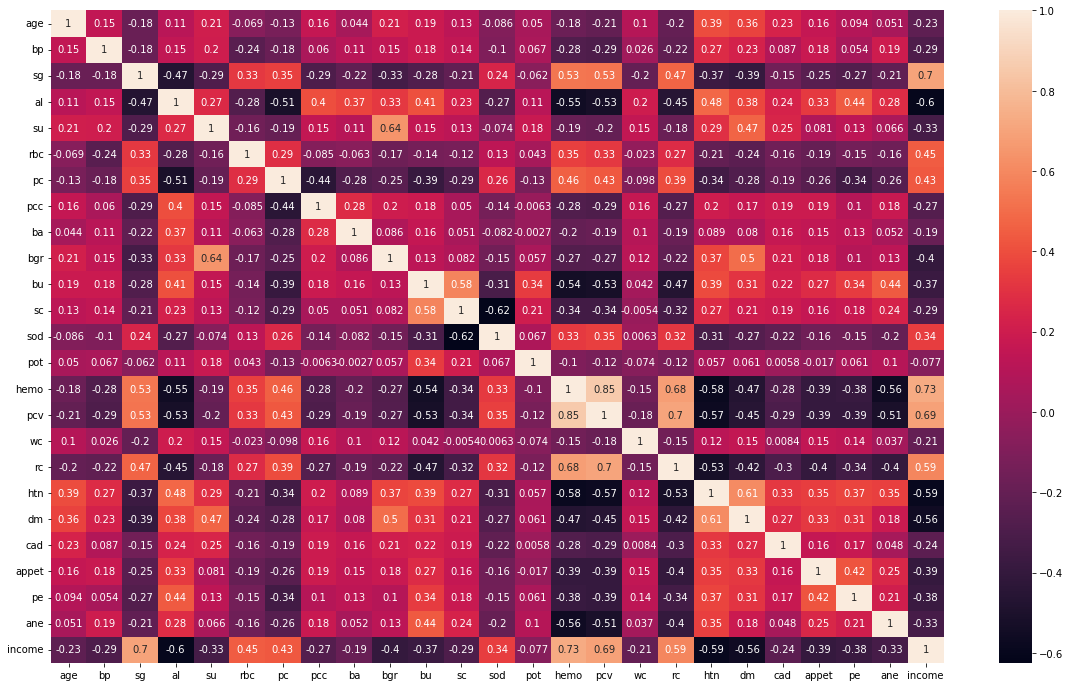

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(data.assign(income=target).corr(),annot=True)

**From the heat map it appears that there are features that have a high correlation coefficient, but there are also some features that show a strong decrease in the correlation coefficient, and therefore to summarize that map I will include the following code.**

In [34]:
# Find correlations with the target and sort
correlations = new_data.corr()['classification'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

Most Positive Correlations:
 rc                0.590913
pcv               0.690060
sg                0.698957
hemo              0.729628
classification    1.000000
Name: classification, dtype: float64

Most Negative Correlations:
 al      -0.599238
htn     -0.590438
dm      -0.559060
bgr     -0.401374
appet   -0.393341
Name: classification, dtype: float64


# 1.6. Decision Tree as EDA

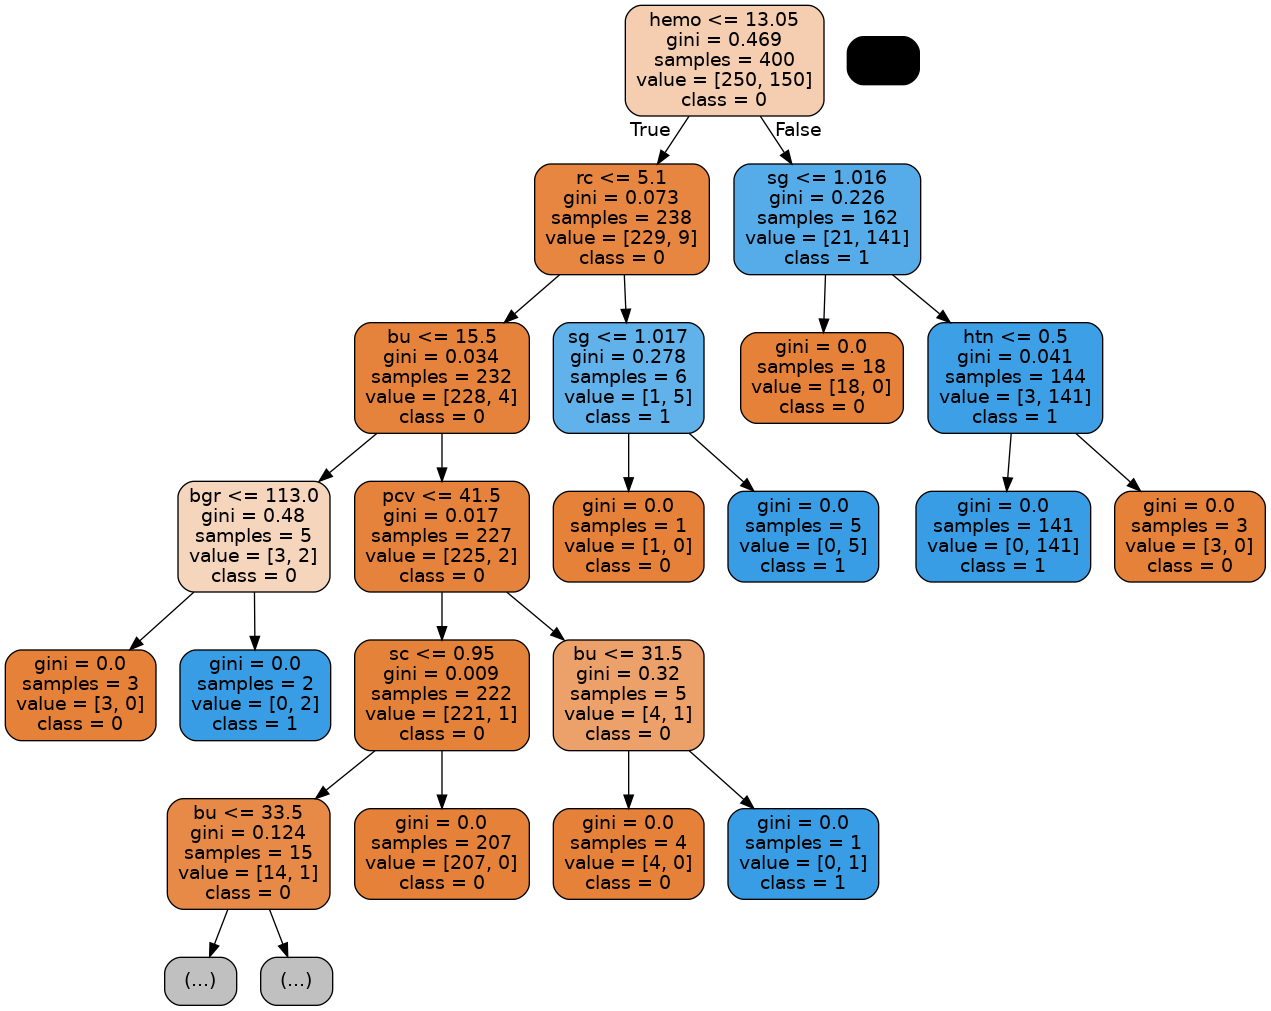

In [35]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import pydot

#data_oh=data_oh.drop(columns=['fnlwgt'])
tree=DecisionTreeClassifier().fit(data,target)

with open("tree1.dot", 'w') as dot:
    dot = export_graphviz(tree,
                          out_file=dot,
                          max_depth = 5,
                          impurity = True,
                          class_names = ['0','1'],
                          feature_names = data.columns.values,
                          rounded = True,
                          filled= True )

    
# Annotating chart with PIL
(graph,) = pydot.graph_from_dot_file('tree1.dot')

graph.write_png('tree1.png')
PImage('tree1.png')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,0.0,0.172519,0.0,0.0,0.0,0.000664,0.0,0.0,0.0128,...,0.712667,0.001993,0.0,0.04155,0.031333,0.0,0.0,0.0,0.0,0.0


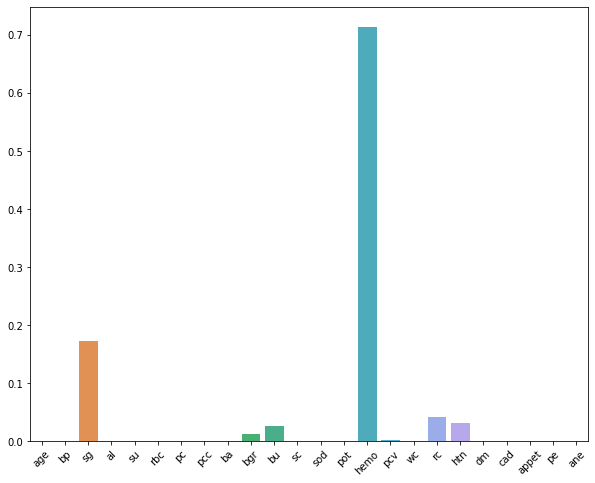

In [36]:
feat_impt=pd.DataFrame(data=tree.feature_importances_).T
feat_impt.columns=data.columns.values

names = list(data.columns.values)

feature_importances=pd.DataFrame()
for column in names:
    value=feat_impt.filter(regex=column)
    value=value.mean(axis=1)
    feature_importances[column]=value

#feature_importances=pd.melt(feature_importances)
plt.figure(figsize=(10,8))
p=sns.barplot(data=feature_importances)
p.set_xticklabels(p.get_xticklabels(),rotation=45)
feature_importances

**Wow, from the results it is clear that there are two columns `['sg','hemo']`that make up the highest percentage of impact on the results, and therefore they will form a block during training and this leads to a problem, but I have only two options, the first is to delete the two columns and complete the work, and the second is to leave the two columns as they are without change, and in that case I'll go with the second option, and leave the two columns unchanged.**

**Also, I can follow a middle way, which is to delete the top column only. This is a third solution.
But I would still follow the second option.**

# 1.7. Complete the data split

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [38]:
new_features = scaler.transform(data)
print(new_features)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 1.         0.         1.        ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         0.        ]]


In [39]:
new_features.shape

(400, 24)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(new_features, target, test_size = 0.20, random_state = 44)

In [41]:
print('X_train after :',X_train.shape)
print('X_valid after :' , X_valid.shape)
print('y_train after :',y_train.shape)
print('y_valid after :' , y_valid.shape)

X_train after : (320, 24)
X_valid after : (80, 24)
y_train after : (320,)
y_valid after : (80,)


# Part 2: Machine Learning Algorithms

# 2.1. Support Vector classifier

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [70]:
#Import Libraries
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=50,C=0.01,gamma='auto',degree=2)
SVCModel.fit(X_train, y_train);

In [73]:
#Calculating Prediction
y_predict_svc = SVCModel.predict(X_valid)
print('Predicted Value for Support Vector classifier is :\n' , y_predict_svc[:10])
print('The real values we want to classify ..........is :\n' , y_valid[:10])

Predicted Value for Support Vector classifier is :
 [0 1 0 1 0 0 1 0 1 1]
The real values we want to classify ..........is :
 201    0
258    1
114    0
270    1
7      0
90     0
269    1
221    0
365    1
278    1
Name: classification, dtype: int64


In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_predict_svc))

0.95


In [75]:
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_valid, y_valid))

SVCModel Train Score is :  0.965625
SVCModel Test Score is :  0.95


In [76]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix=confusion_matrix(y_valid,y_predict_svc)
confusion_matrix

array([[39,  4],
       [ 0, 37]])

# 2.2. Make sure the results are accurate

In [77]:
#Perform K fold CV
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

results = cross_val_score(SVCModel, new_features, target, cv=kfold)

print("Accuracy = " + str(results.mean()));

Accuracy = 0.9575000000000001


In [87]:
scores = cross_val_score(SVCModel, new_features, target, cv=5);
print(scores)

[0.975  1.     0.925  0.9625 0.925 ]


# 2.3. ExtraTreesClassifier Algorithm

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

In [80]:
model = ExtraTreesClassifier(n_estimators=10, random_state=0, min_samples_leaf=1,max_features='log2',bootstrap=True, oob_score=True)
model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, max_features='log2', n_estimators=10,
                     oob_score=True, random_state=0)

In [81]:
print('ExtraTreesClassifiermodel Train Score is : ' , model.score(X_train, y_train))
print('ExtraTreesClassifiermodel Test Score is : ' , model.score(X_valid, y_valid))

#Calculating Prediction
y_predict = model.predict(X_valid)
y_predict_prob = model.predict_proba(X_valid)
print('Predicted Value for ExtraTreesClassifiermodel is :\n' , y_predict[:10])
print('The real values we want to classify ..........is :\n' , y_valid[:10])
print('Prediction Probabilities Value for ExtraTreesClassifiermodel is :\n' , y_predict_prob[:10])

ExtraTreesClassifiermodel Train Score is :  1.0
ExtraTreesClassifiermodel Test Score is :  1.0
Predicted Value for ExtraTreesClassifiermodel is :
 [0 1 0 1 0 0 1 0 1 1]
The real values we want to classify ..........is :
 201    0
258    1
114    0
270    1
7      0
90     0
269    1
221    0
365    1
278    1
Name: classification, dtype: int64
Prediction Probabilities Value for ExtraTreesClassifiermodel is :
 [[1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [0.9 0.1]
 [0.  1. ]
 [1.  0. ]
 [0.1 0.9]
 [0.  1. ]]


In [82]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix=confusion_matrix(y_valid,y_predict)
confusion_matrix

array([[43,  0],
       [ 0, 37]])

# 2.4. Make sure the results are accurate

In [83]:
#Perform K fold ExtraTreesClassifiermodel
num_folds = 5
seed = 42
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)

results = cross_val_score(model, new_features, target, cv=kfold)

print("Accuracy = " + str(results.mean()));

Accuracy = 0.99


In [85]:
scores = cross_val_score(model, new_features, target, cv=5);
print(scores)

[1.     1.     0.9875 1.     1.    ]


# Part 3: Deep Learning Algorithms

# 3.1. Keras Functional API Model

In [119]:
import tensorflow
from tensorflow import keras
from keras import layers , Input 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import  plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import layers

In [149]:
top = Input(shape=(24))
t = top
t=layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(t)
t=layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(t);

In [150]:
y = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(t)
y = Dropout(rate = 0.01)(y)
y = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(y)
y = Dropout(rate = 0.01)(y)

In [151]:
x = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(t)
x = Dropout(rate = 0.01)(x)
x = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(x)
x = Dropout(rate = 0.01)(x)

In [152]:
from tensorflow.keras.layers import concatenate
import random

In [153]:
# merge left and right branches outputs
z = concatenate([x, y])

In [154]:
e = layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(z)
e = Dropout(rate = 0.01)(e)
e = layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(e)
e = Dropout(rate = 0.02)(e)
e = layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu')(e)
e = Dropout(rate = 0.01)(e)


# output layer
# e = layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')(e)
output=layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')(e)

In [155]:
# build the model in functional API
model = Model(top, output)

In [141]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 24)]         0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 32)           800         input_5[0][0]                    
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 32)           1056        dense_32[0][0]                   
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 64)           2112        dense_33[0][0]                   
____________________________________________________________________________________________

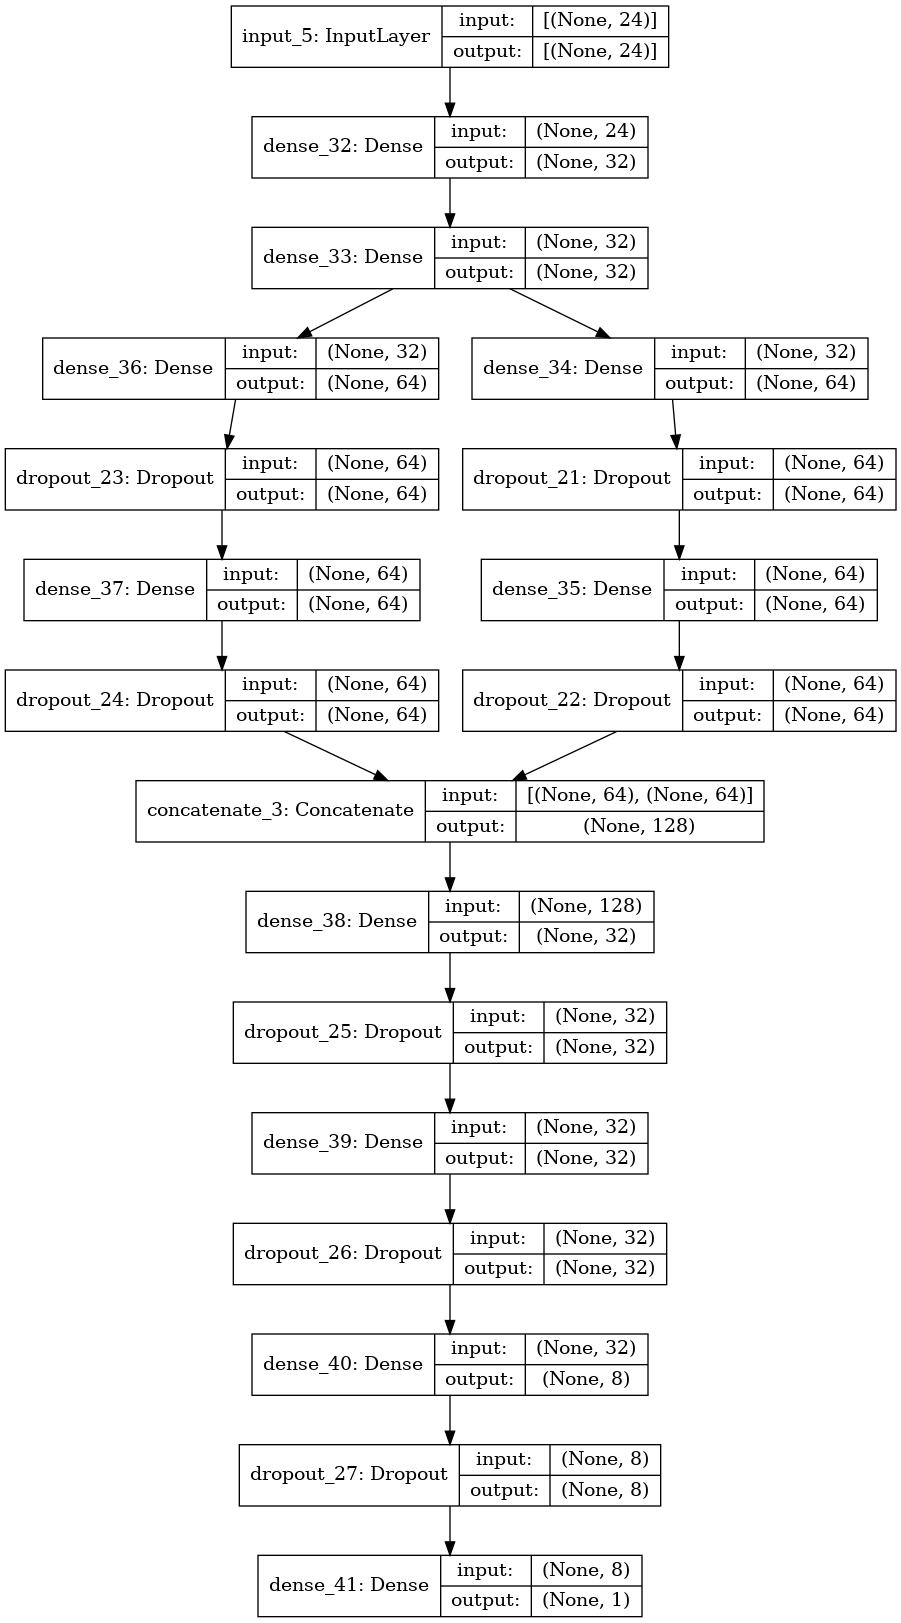

In [142]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file='model_API.png', show_shapes=True)

In [156]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [157]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracy=[]
        self.val_accuracy=[]
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

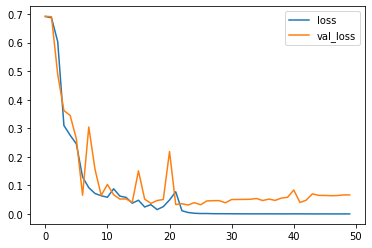

In [158]:
# train the model with input images and labels
history=model.fit(X_train,
          y_train, 
          validation_data=(X_valid, y_valid),
          epochs=50,
          batch_size=10,callbacks=[plot_losses])

In [176]:
# model accuracy on train dataset
score = model.evaluate(X_train,
                       y_train,
                       verbose=0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score[1]))


Train accuracy: 100.0%


In [160]:
# model accuracy on test dataset
score = model.evaluate(X_valid,
                       y_valid,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 98.8%


In [161]:
eval_score = model.evaluate(X_valid, y_valid)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

3/3 [==============================] - 0s 5ms/step - loss: 0.0666 - accuracy: 0.9875
Test loss: 0.06661244481801987
Test accuracy: 0.987500011920929


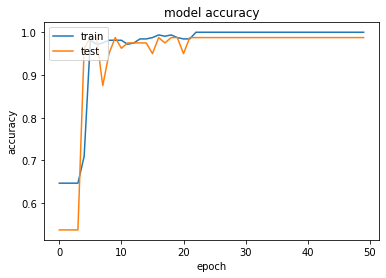

In [167]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3.2. Saving the weights of the network

In [169]:
model.save('Structure of a neural network for kidney disease model_1.h5')

**Our model, suffers from overfitting in a not small proportion where the accuracy level of the training data reached 100.0%, while the accuracy level of the test data reached 98.8%, and therefore the model must be reset to overcome the overfitting that was recorded.**

# 3.3. Sequential Model

In [192]:
# Initialising the ANN
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))


# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32)                800       
_________________________________________________________________
dropout_47 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_48 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_49 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)                

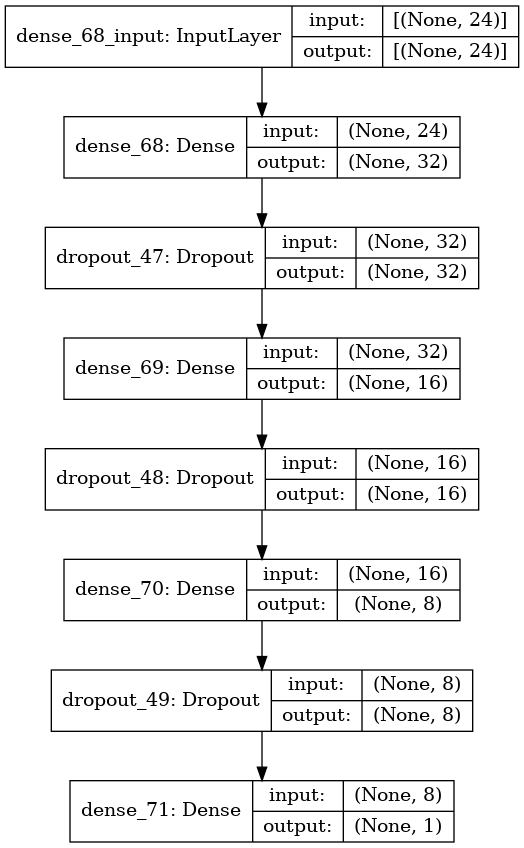

In [193]:
plot_model(model_S, to_file='model.png', show_shapes=True)

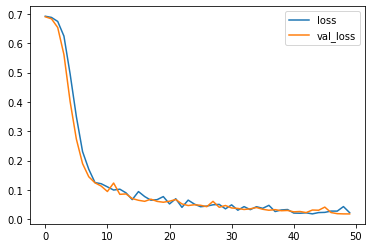

In [194]:
history = model_S.fit(X_train,y_train,epochs=50,batch_size=10,verbose=2,validation_split=0.2, callbacks=[plot_losses])

In [195]:
# model accuracy on train dataset
score = model_S.evaluate(X_train,
                       y_train,
                       verbose=0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score[1]))


Train accuracy: 99.7%


In [196]:
# model accuracy on test dataset
score = model_S.evaluate(X_valid,
                       y_valid,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 98.8%


In [197]:
eval_score = model_S.evaluate(X_valid, y_valid)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

3/3 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9875
Test loss: 0.034839510917663574
Test accuracy: 0.987500011920929


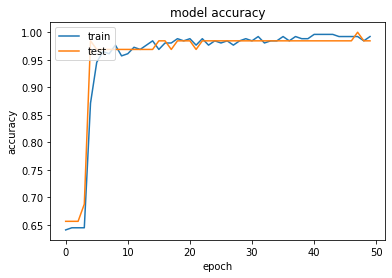

In [199]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3.4. Saving the weights of Sequential Model 

In [203]:
model_S.save('Structure of a Sequential Model for kidney disease model_S.h5')

**In the second model, we notice a decrease in the overfitting value between the accuracy level of the training data, which is 99.7%, and the accuracy level of the test data is 98.8%, but the overfitting value is still present, but I will return again to improve those results.**

# Part 4: End

**Thank you very much, we will meet again**